# Test

Dummy tutorial to test notebook generation for this repository

### Set-up

#### How to run this Julia notebook in Colab's Python environment

1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. Execute the following cell (click on it and press Ctrl+Enter) to install Julia and IJulia.
3. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2 and 3.
* If you still have problems, try resetting the runtime: Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 2 and 3.


In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.3" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia InstantiateFromURL"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

Inspect Julia version:

In [1]:
VERSION

v"1.6.3"

The following instantiates a package environment.

The package environment has been created using **Julia 1.6** and may not
instantiate properly for other Julia versions.

In [2]:
using InstantiateFromURL
github_project("ablaom/HelloJulia", path="demos/test/env", instantiate=true)

  Activating environment at `~/GoogleDrive/Julia/HelloJulia/demos/test/env/Project.toml`


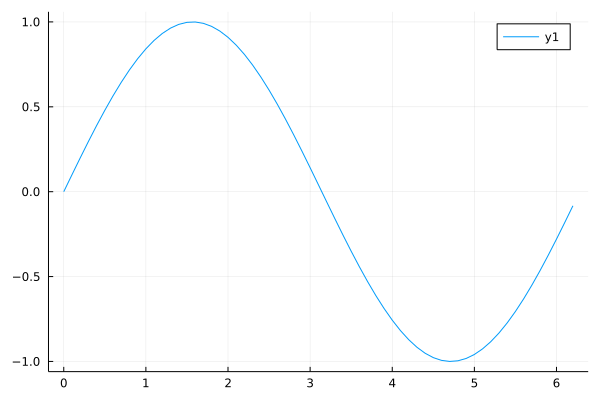

In [3]:
using Plots
x = 0:0.1:2pi
y = sin.(x)
plt = plot(x, y)
savefig("my_plot.png")
plt

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*